# Convergence of Fitzhugh-Nagumo model

The purpose of this notebook is to check the convergence of the Fitzhugh-Nagumo model when solved with different numerical methods. Since there is no analytical solution to the Fitzhugh-Nagumo model, a reference solution is computed with small step size or low tolerance, depending on the numerical method.

## Fitzhugh-Nagumo model and setup problem

In [1]:
import solver

# Define Fitzhugh-Nagumo model
def fitzhugh_nagumo(x, y):
    alpha = 0.1
    gamma = 0.5
    epsilon = 0.01
    eq1 = (y[0] * (1 - y[0]) * (y[0] - alpha) - y[1] + 0.026) / epsilon
    eq2 = y[0] - gamma * y[1]

    return [eq1, eq2]

# Define initialisation value for numerical method
x_min = 0
x_max = 1
initial_value = [0.01, 0.01]

## Computation of reference solution to the Fitzhugh-Nagumo model

In [2]:
# Create reference solution
ref_stepsize = 1e-7
mesh_pt = (x_max - x_min) / ref_stepsize

problem = solver.OneStepMethods(
    fitzhugh_nagumo, x_min, x_max, initial_value, mesh_pt)

# Solve with Euler's explicit method
ref_mesh, ref_soln = problem.Euler_explicit()

## Solving the Fitzhugh-Nagumo model with Euler's explicit method

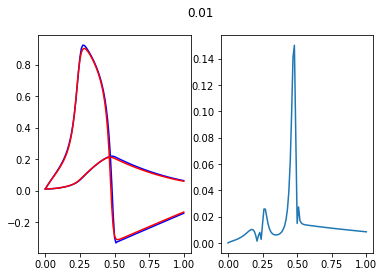

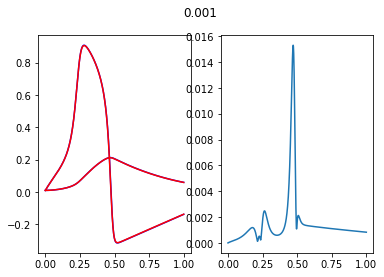

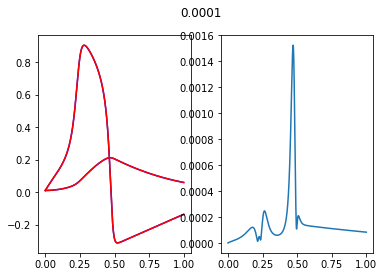

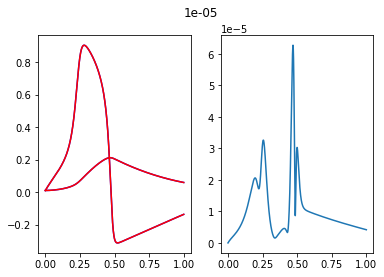

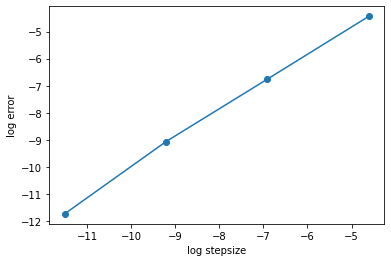

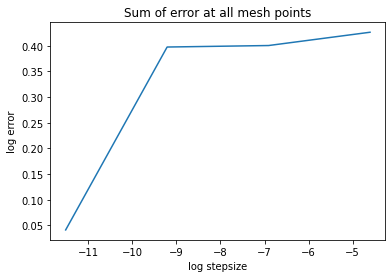

In [3]:
# Define the range of step sizes for comparison
stepsize_range = [1e-2, 1e-3, 1e-4, 1e-5]

# Solve the problem with Euler's explicit method
meshpt_range = [(x_max - x_min) / step for step in stepsize_range]
mesh_list = []
soln_list = []
for mesh_points in meshpt_range:
    problem = solver.OneStepMethods(
        fitzhugh_nagumo, x_min, x_max, initial_value, mesh_points)

    mesh, soln = problem.Euler_explicit()
    mesh_list.append(mesh)
    soln_list.append(soln)

    
import numpy as np

# Compute reference solution and error of numerical solution
# Error is the L2 norm difference between numerical solution and reference solution
exact_soln_list = []
error_list = []
count = 0
for (mesh,soln) in zip(mesh_list,soln_list):
    mesh_point_diff = stepsize_range[count] / ref_stepsize
    exact_soln = []
    error = []
    for i in range(len(mesh)):
        ref_value = ref_soln[int(i * mesh_point_diff)]
        exact_soln.append(ref_value)
        
        err_value = np.linalg.norm(np.array(ref_value) - np.array(soln[i]))
        error.append(err_value)
        
    exact_soln_list.append(exact_soln)
    error_list.append(error)
    count += 1
    
    
import matplotlib.pyplot as plt

# Visualise the results
# Plot of reference solution and error of numerical solution
for i in range(len(mesh_list)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(str(stepsize_range[i]))
    ax1.plot(mesh_list[i], soln_list[i], 'b')
    ax1.plot(mesh_list[i], exact_soln_list[i], 'r')
    ax2.plot(mesh_list[i], error_list[i])
    plt.show()

sum_error_stepsize = []
error_stepsize = []
for i in range(len(stepsize_range)):
    sum_error_stepsize.append(np.sum(np.array(error_list[i])))
    error_stepsize.append(error_list[i][int(0.7/stepsize_range[i])])

# Compare error at a given mesh point for different step sizes  
plt.figure()
plt.plot(np.log(np.array(stepsize_range)), np.log(np.array(error_stepsize)))
plt.scatter(np.log(np.array(stepsize_range)), np.log(np.array(error_stepsize)))
plt.title('Error at a mesh point')
plt.xlabel('log stepsize')
plt.ylabel('log error')
plt.show()

# Compare sum of error for different step sizes  
plt.figure()
plt.plot(np.log(np.array(stepsize_range)), np.log(np.array(sum_error_stepsize)))
plt.ylabel('log error')
plt.xlabel('log stepsize')
plt.title('Sum of error at all mesh points')
plt.show()

# Adaptive method

A similar comparison is made using adaptive method. Adaptive method does not have fixed mesh points. Moreover, its accuracy is controlled by the tolerance. Therefore, the numerical solution is compared with different tolerances.

## Computation of reference solution with low tolerance value

In [4]:
# Create reference solution
ref_tolerance = 1e-8

problem = solver.AdaptiveMethod(
    fitzhugh_nagumo, x_min, x_max, initial_value, initial_mesh=0.1)

# Solve with adaptive method
ref_mesh, ref_soln = problem.ode23(abs_tol=ref_tolerance, rel_tol=1e-15)

In [5]:
# Define the range of tolerances for comparison
tolerance_range = [1e-2, 1e-3, 1e-4, 1e-5]

# Solve the problem with an adaptive method
mesh_list = []
soln_list = []
for tolerance in tolerance_range:
    problem = solver.AdaptiveMethod(
        fitzhugh_nagumo, x_min, x_max, initial_value, initial_mesh=0.1)

    # Solve with adaptive ode23 method
    mesh, soln = problem.ode23(abs_tol=tolerance, rel_tol=1e-15)
    mesh_list.append(mesh)
    soln_list.append(soln)

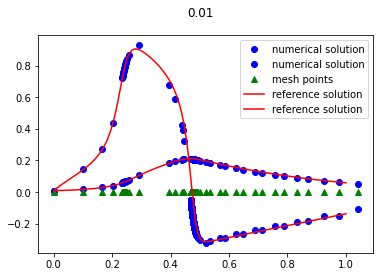

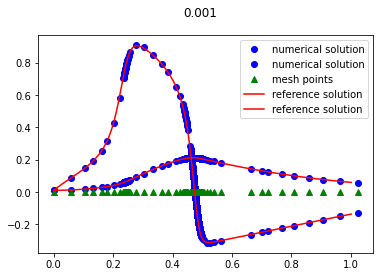

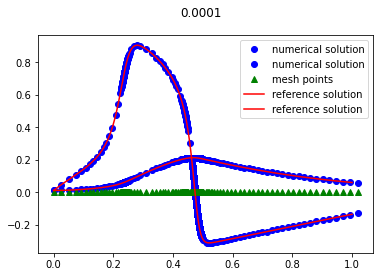

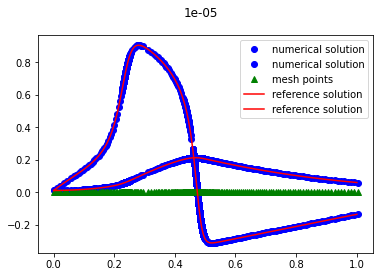

In [6]:
# Plot reference solution, numerical solution and the adapted mesh points
for i in range(len(mesh_list)):
    fig, (ax1) = plt.subplots(1, 1)
    fig.suptitle(str(stepsize_range[i]))
    ax1.plot(mesh_list[i], soln_list[i], 'bo', label='numerical solution')
    ax1.plot(mesh_list[i], [0] * len(mesh_list[i]), 'g^', label='mesh points')
    ax1.plot(ref_mesh, ref_soln, 'r', label='reference solution')
    plt.legend()
    plt.show()

In [7]:
# Get mesh points that exist in all 4 cases
# Points that are sufficiently close to each other are considered as same points
chosen_entries = []
for i in range(len(mesh_list[0])):
    min1 = abs(min(mesh_list[1], key=lambda x:abs(x-mesh_list[0][i])) - mesh_list[0][i])
    min2 = abs(min(mesh_list[2], key=lambda x:abs(x-mesh_list[0][i])) - mesh_list[0][i])
    min3 = abs(min(mesh_list[3], key=lambda x:abs(x-mesh_list[0][i])) - mesh_list[0][i])
    min4 = abs(min(ref_mesh, key=lambda x:abs(x-mesh_list[0][i])) - mesh_list[0][i])
    if max(min1, min2, min3, min4) < 1e-6:
        chosen_entries.append(i)
chosen_entries = chosen_entries[1:]

In [8]:
# Organise mesh points that exist in all 4 cases
chosen_mesh_points = []
for a in chosen_entries:
    chosen_point = mesh_list[0][a]
    min1_pos = np.argmin(abs(np.array(mesh_list[1]) - chosen_point))
    min2_pos = np.argmin(abs(np.array(mesh_list[2]) - chosen_point))
    min3_pos = np.argmin(abs(np.array(mesh_list[3]) - chosen_point))
    min4_pos = np.argmin(abs(np.array(ref_mesh) - chosen_point))
    chosen_mesh_points.append([a, min1_pos, min2_pos, min3_pos, min4_pos])

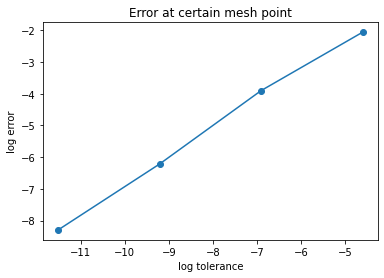

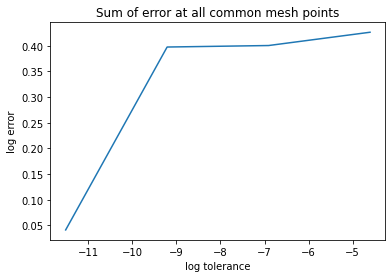

In [9]:
# Compute difference between numerical solution and reference solution of mesh points that exist in all 4 cases
error_list = []
for i in range(len(tolerance_range)):
    error = []
    for points in chosen_mesh_points:
        ref_value = ref_soln[points[4]]

        err_value = np.linalg.norm([ref_value[k] - soln_list[i][points[i]][k] for k in range(2)])
        error.append(err_value)
        
    error_list.append(error)

# Plot the error at a given mesh point for different tolerances
fixed_point = round(len(error_list[0])*3/4-1)
error_tolerance = []
for i in range(len(tolerance_range)):
    error_tolerance.append(error_list[i][fixed_point])
    
plt.figure()
plt.plot(np.log(np.array(tolerance_range)), np.log(np.array(error_tolerance)))
plt.scatter(np.log(np.array(tolerance_range)), np.log(np.array(error_tolerance)))
plt.title('Error at a mesh point')
plt.xlabel('log tolerance')
plt.ylabel('log error')
plt.show()

# Plot the sum of error for different tolerances
sum_error_tolerance = []
for i in range(len(tolerance_range)):
    sum_error_tolerance.append(np.sum(np.array(error_list[i])))

plt.figure()
plt.plot(np.log(np.array(tolerance_range)), np.log(np.array(sum_error_stepsize)))
plt.title('Sum of error at all common mesh points')
plt.ylabel('log error')
plt.xlabel('log tolerance')
plt.show()